# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [1]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

In [2]:
# Import du dataframe "data.csv"
df =pd.read_csv('data.csv')

#j'efectue une correction sur le dataset , suite a des erreurs eu dans la suite de l'exerice.
#les float etait noté avec des virgules aulieu de points. 
#je decide de corriger le dataset au debut
#j'ai aussi remarqué qu'il y avait 2 technologies qui etait les memes sauf que sur l'une ""SQL/R/Python//Big data" 
#et "SQL/R/Python/Big data"

df["Experience"]= df["Experience"].str.replace(",", ".") 
df["Technologies"]= df["Technologies"].str.replace("//", "/") 


print()

### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

In [3]:
#Nombre d'observation dans le dataset est :
print('Nombre d"observation dans le dataset est : ' , len(df))

print('la desciption detaillé du dataframe est : ')
df.describe()


Nombre d"observation dans le dataset est :  9582
la desciption detaillé du dataframe est : 


Entreprise          Metier           Technologies Diplome  \
count             9565            9563                   9582    9582   
unique            1382               4                     56       4   
top     Ball Aerospace  Data scientist  SQL/R/Python/Big data  Master   
freq               748            3865                    540    4971   

       Experience  Ville  
count        9488   9582  
unique         21     14  
top           1.5  Paris  
freq         1023   2015

In [4]:
# rechercher les valeurs manquantes :
print('le dataset contient-il des valeurs manquantes : ' , df.isnull().values.any())

#verifier laquelle des variable contient des valeurs manquantes : 
print('Recapitulatif du nombre de valeurs manquantes par variables : \n', df.isnull().sum())


le dataset contient-il des valeurs manquantes :  True
Recapitulatif du nombre de valeurs manquantes par variables : 
 Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64


### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

In [5]:
# recuperation des incides des valeurs manquantes pour la variable experience :
idx_Valeurs_manquantes_experience=np.where(df['Experience'].isnull()==True)

#calculer la mediane et la moyenne de l'experience des profils
moyenne = pd.to_numeric(df["Experience"], errors='coerce').mean()
mediane = pd.to_numeric(df["Experience"], errors='coerce').median()

# je parcours la variable experience afin de faire une imputation selon les conditions fixés
for idx in idx_Valeurs_manquantes_experience[0] :
    if df['Metier'][idx]=='Data scientist':
        df.loc[idx,'Experience']=mediane
    elif df['Metier'][idx]=='Data engineer' :
        df.loc[idx,'Experience']=moyenne

#verifier laquelle des variable contient des valeurs manquantes : 
print('Recapitulatif du nombre de valeurs manquantes par variables : \n', df.isnull().sum())

Recapitulatif du nombre de valeurs manquantes par variables : 
 Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      42
Ville            0
dtype: int64


In [6]:
#verifier que les variables ont bien eté remplit :
print('nombre de valeur manquantes pour les Data scientists : \n', df[df['Metier']=='Data scientist']['Experience'].isnull().sum())
print('nombre de valeur manquantes pour les Data engineers : \n', df[df['Metier']=='Data engineer']['Experience'].isnull().sum())


# on remarque que les valeurs manquantes pour la variable experience pour les data scientist et 
#data engineers ont eté bien imputés

nombre de valeur manquantes pour les Data scientists : 
 0
nombre de valeur manquantes pour les Data engineers : 
 0


### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

In [7]:
#calcul de la moyennes des differentes categories de la variable metier.
moyenne_data_scientists = round(pd.to_numeric(df[df['Metier']=='Data scientist']["Experience"], errors='coerce').mean(),1)
moyenne_lead_data_scientists = round(pd.to_numeric(df[df['Metier']=='Lead data scientist']["Experience"], errors='coerce').mean(),1)
moyenne_data_engineers = round(pd.to_numeric(df[df['Metier']=='Data engineer']["Experience"], errors='coerce').mean(),1)
print("nombre d'années d'experiences pour les data scientists : ",moyenne_data_scientists)
print("nombre d'années d'experiences pour les lead data scientists : ",moyenne_lead_data_scientists)
print("nombre d'années d'experiences pour les data data engineers : ",moyenne_data_engineers)


nombre d'années d'experiences pour les data scientists :  2.2
nombre d'années d'experiences pour les lead data scientists :  4.0
nombre d'années d'experiences pour les data data engineers :  3.0


### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

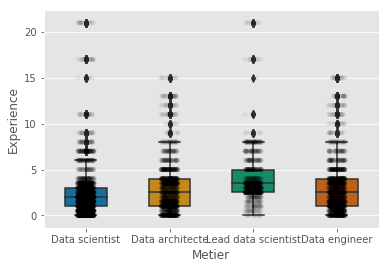

In [8]:
df["Experience"]=pd.to_numeric(df["Experience"], errors='coerce').astype(np.float32)

# make boxplot with Seaborn
bplot=sb.boxplot(y='Experience', x='Metier', data=df,width=0.5,palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sb.stripplot(y='Experience', x='Metier', data=df,  jitter=True,   marker='o', alpha=0.05, color='black')



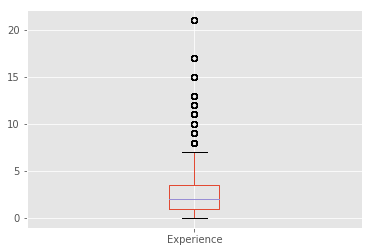

In [9]:
df.boxplot(column= 'Experience')


### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

In [10]:
#je prend l'initiative de faire une imputation pour les lead data scientist et data architecte basé
#sur leur moyenne respective.

#cal de la moyennes de data_architectes 
moyenne_data_architectes = round(pd.to_numeric(df[df['Metier']=='Data architecte']["Experience"], errors='coerce').mean(),1)

#recuperation des indices de valeurs manquantes pour la variable experience 
#qui n'ont pas eté encore imputés

idx_Valeurs_manquantes_experience=np.where(df['Experience'].isnull()==True)

for idx in idx_Valeurs_manquantes_experience[0] :
    if df['Metier'][idx]=='Data architecte': 
        df.loc[idx,'Experience']=moyenne_data_architectes 
    elif df['Metier'][idx]=='Lead data scientist' :
        df.loc[idx,'Experience']=moyenne_lead_data_scientists

print('Recapitulatif du nombre de valeurs manquantes par variables : \n', df.isnull().sum())



Recapitulatif du nombre de valeurs manquantes par variables : 
 Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience       0
Ville            0
dtype: int64


In [11]:
#calcul de la moyenne de l'experience de toute la dataframe.
moyenne_experience= round(pd.to_numeric(df[df['Metier']=='Data scientist']["Experience"], errors='coerce').mean(),1)

#recuperation des valeurs manquantes 
#list_indexes = np.where(df['Experience'].isnull()==False)

for idx in range (len(df)):

    if df['Experience'][idx] <= moyenne_experience :
        Exp_label='débutant'
    elif moyenne_experience< df['Experience'][idx] <= moyenne_lead_data_scientists :
        Exp_label='confirmé'

    elif moyenne_lead_data_scientists< df['Experience'][idx] <=10 : 
        Exp_label='avancé'

    elif df['Experience'][idx] >10 : 
        Exp_label='expert'
    df["Experience"][idx]=Exp_label


c:\programdata\anaconda3\envs\nanovare\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\programdata\anaconda3\envs\nanovare\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

In [12]:
df['Technologies'].value_counts()[0:5]
Frequences=df['Technologies'].value_counts()[0:5]
print(Frequences)

SQL/R/Python/Big data                                 540
SAS/Teradata/SQL/R/Python/Machine learning/Anglais    458
C++/R/Python/Matlab/Matplotlib                        273
Hadoop/Hive/Vertica/Tableau                           250
SPSS/Excel/SAS/R/machine learning/AI/Scoring          250
Name: Technologies, dtype: int64


Text(0,0.5,'Frequences')

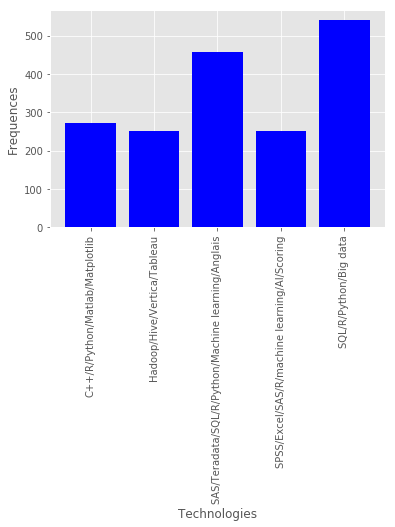

In [13]:
counts = df['Technologies'].value_counts().to_dict()
list_keys = [ k for i,k in enumerate (counts) if i<5]

plt.bar(list_keys,Frequences,align='center',color='blue') 

plt.xticks(rotation=90)
plt.xlabel('Technologies')
plt.ylabel('Frequences')




### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

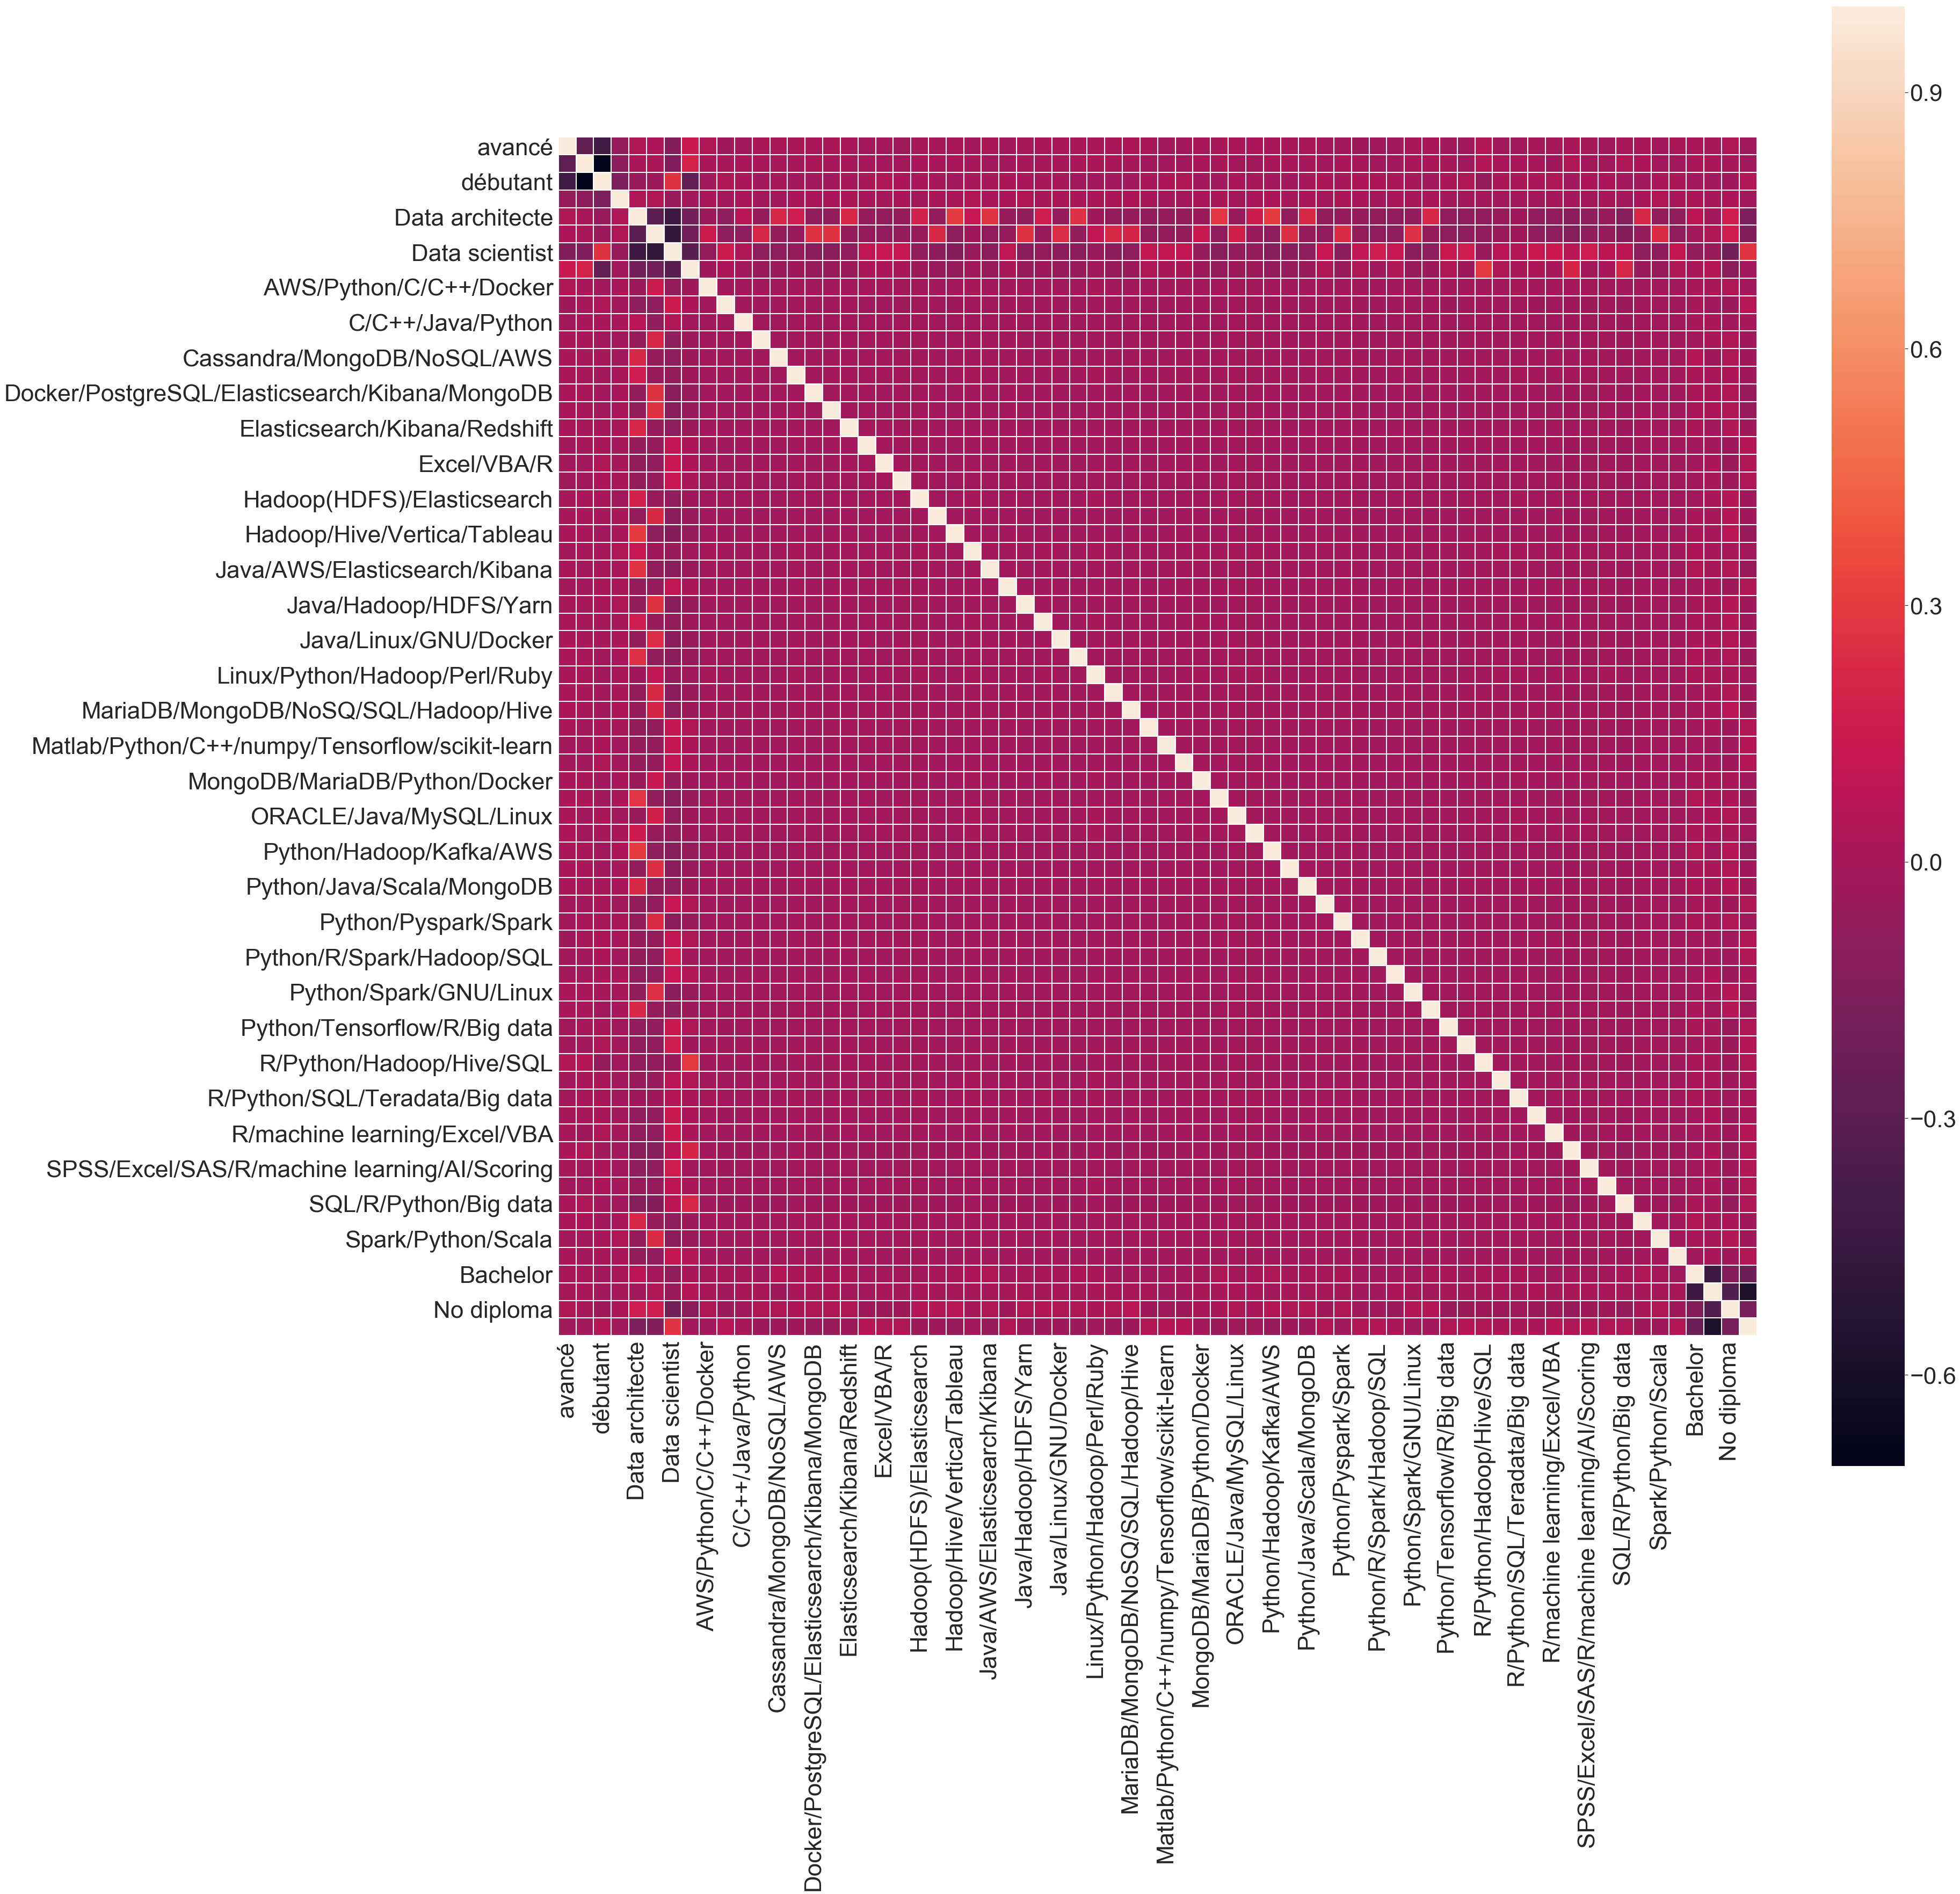

In [14]:
#dans cette premiere partie jeffectue un heatmap des correlation de differentes combinaison de variable
#afin de voir comment les data sont corrélés.

# Pour la suite de l'exercice, j'effectue aussi un one-hot-coding vue que mes données sont categoriques.
# j'applique ce coding juste apres la selection des colonnes que je souhaites analyser.

#j'ignore les variable et entreprise.
small_df=df[['Experience','Metier','Technologies','Diplome']]
dfDummies = pd.get_dummies(small_df ,prefix='', prefix_sep='')
plt.figure(figsize=(50, 50))
sb.set(font_scale=4)
cor = dfDummies.corr() 
sb.heatmap(cor,linewidths=1, square = True)



#on remarque qu'il ya un correlation entre les technologies, metier et experience.

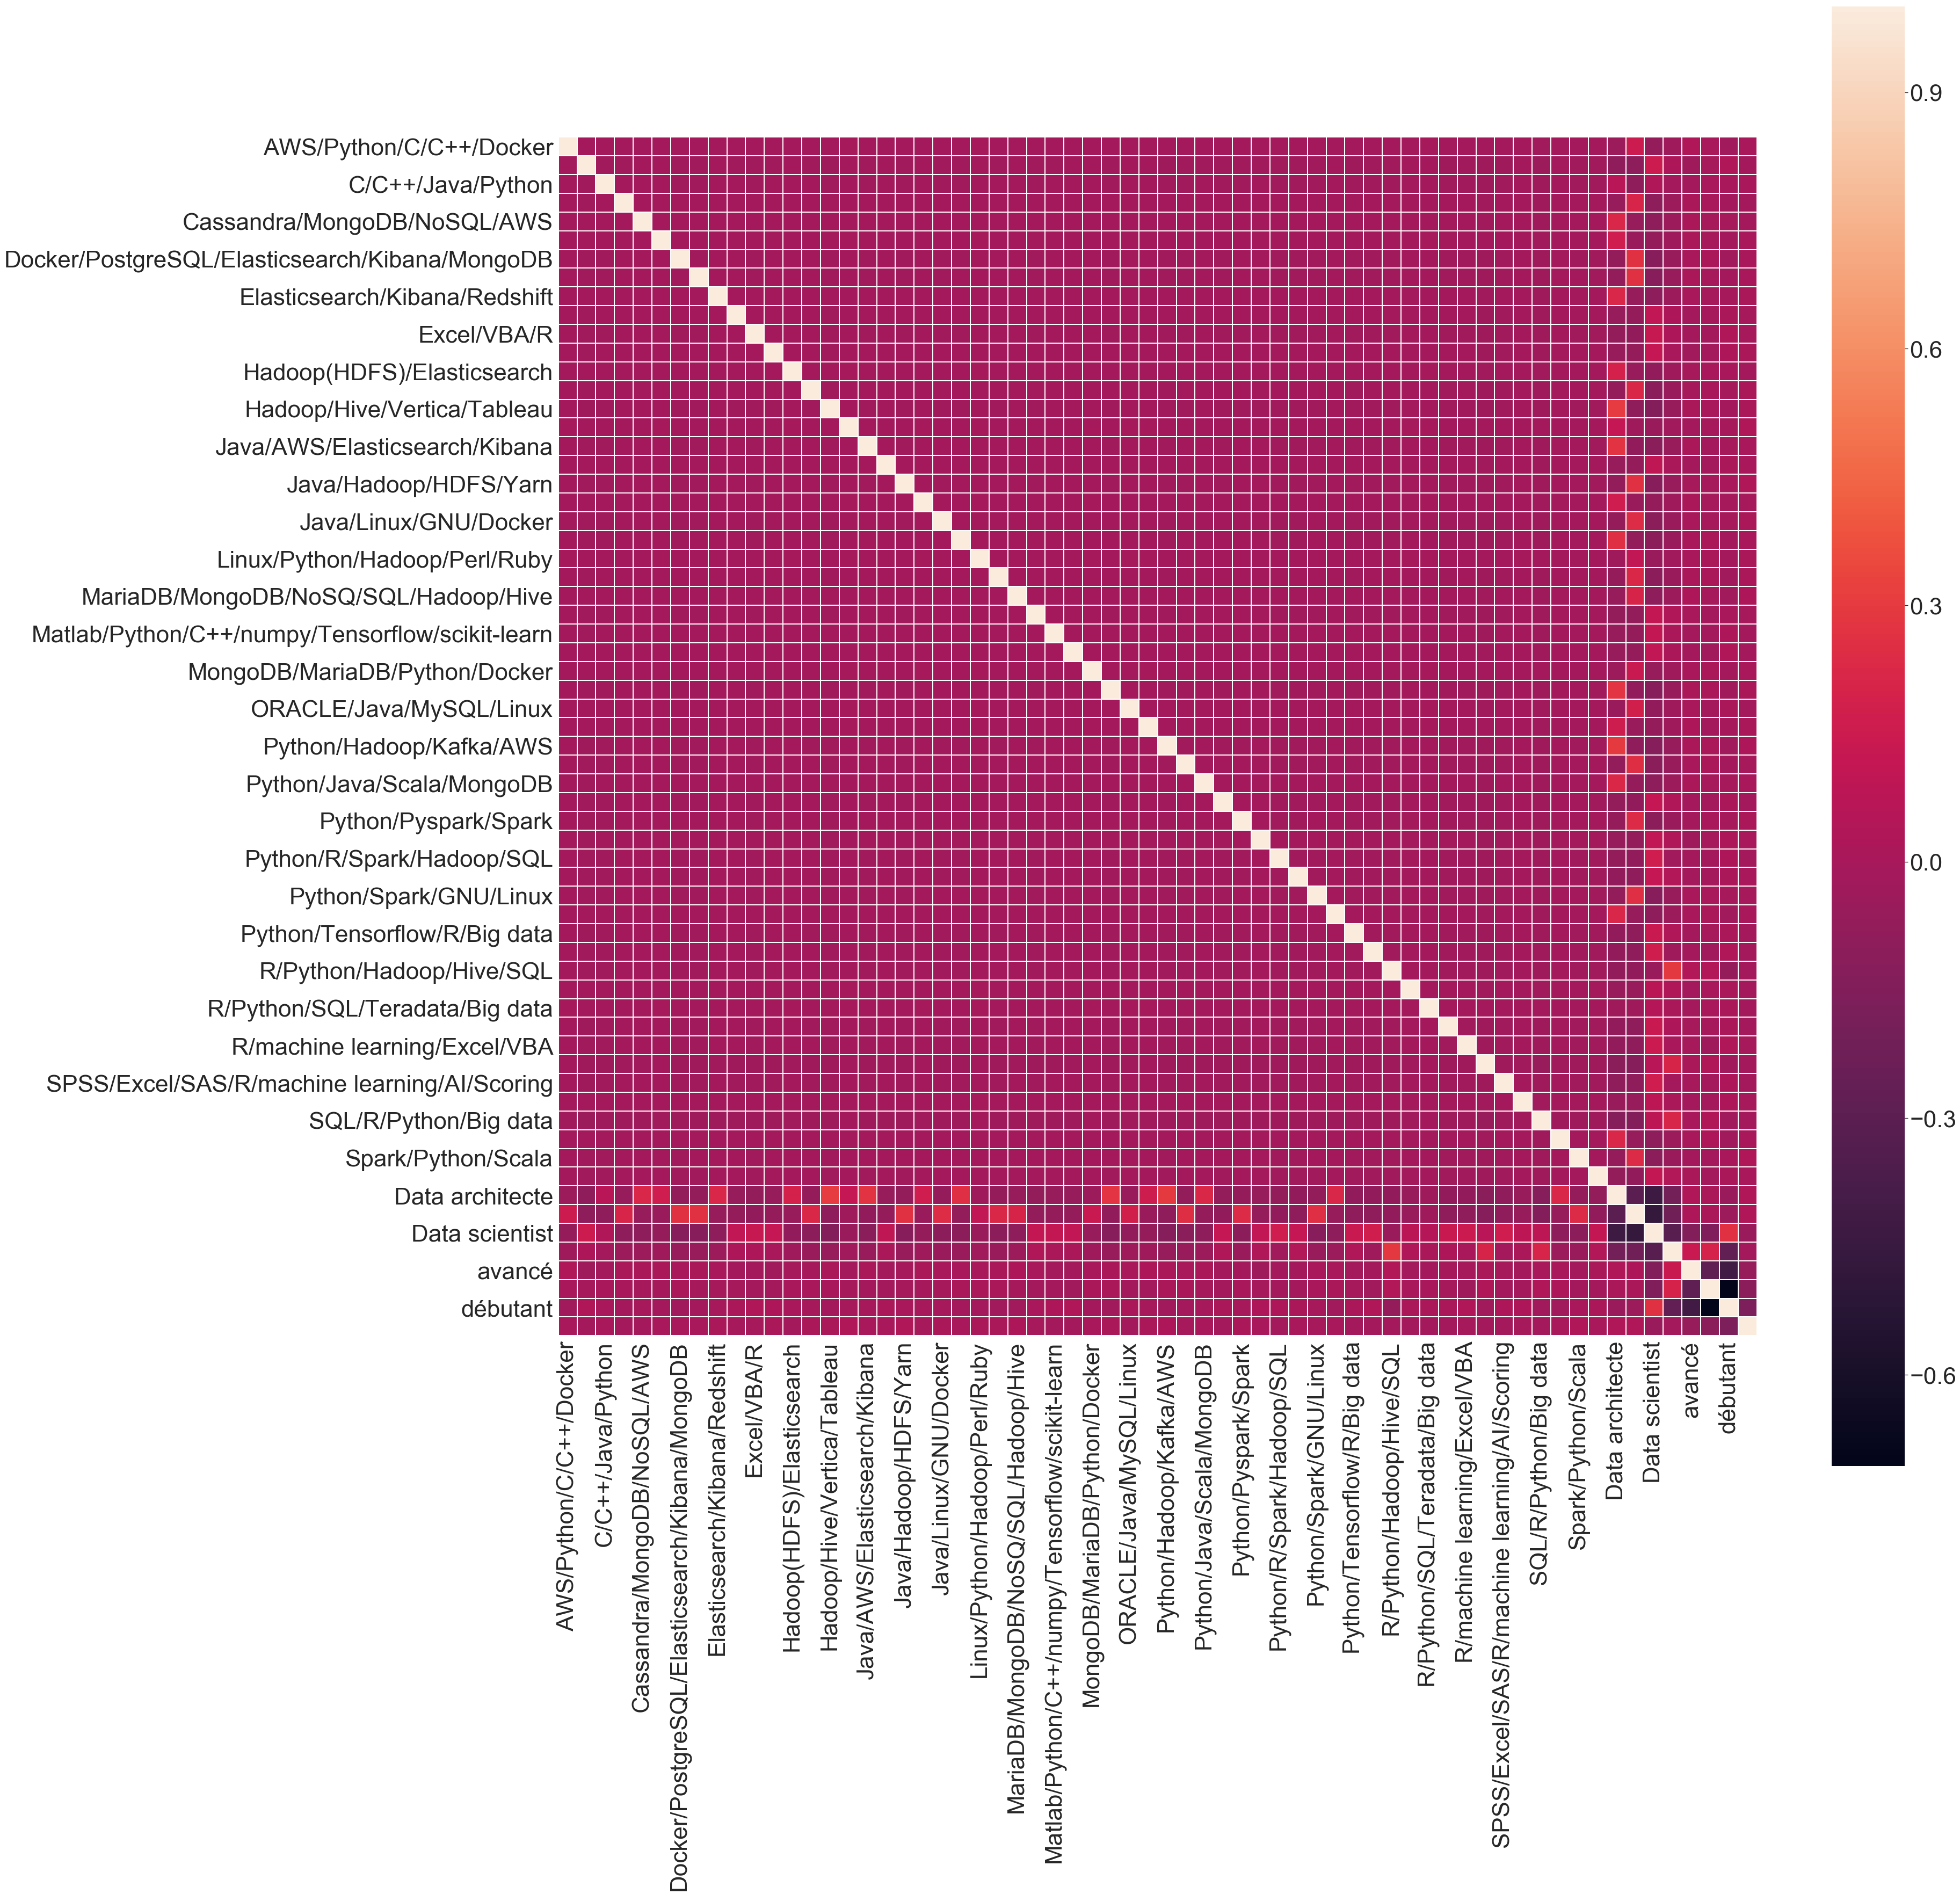

In [15]:
#selection des colones suivi d'un onehotcoding
small_df=df[['Technologies','Metier','Experience']]
dfDummies = pd.get_dummies(small_df ,prefix='', prefix_sep='')
cor = dfDummies.corr() 
plt.figure(figsize=(50, 50))
sb.set(font_scale=4)
sb.heatmap(cor,linewidths=1, square = True)


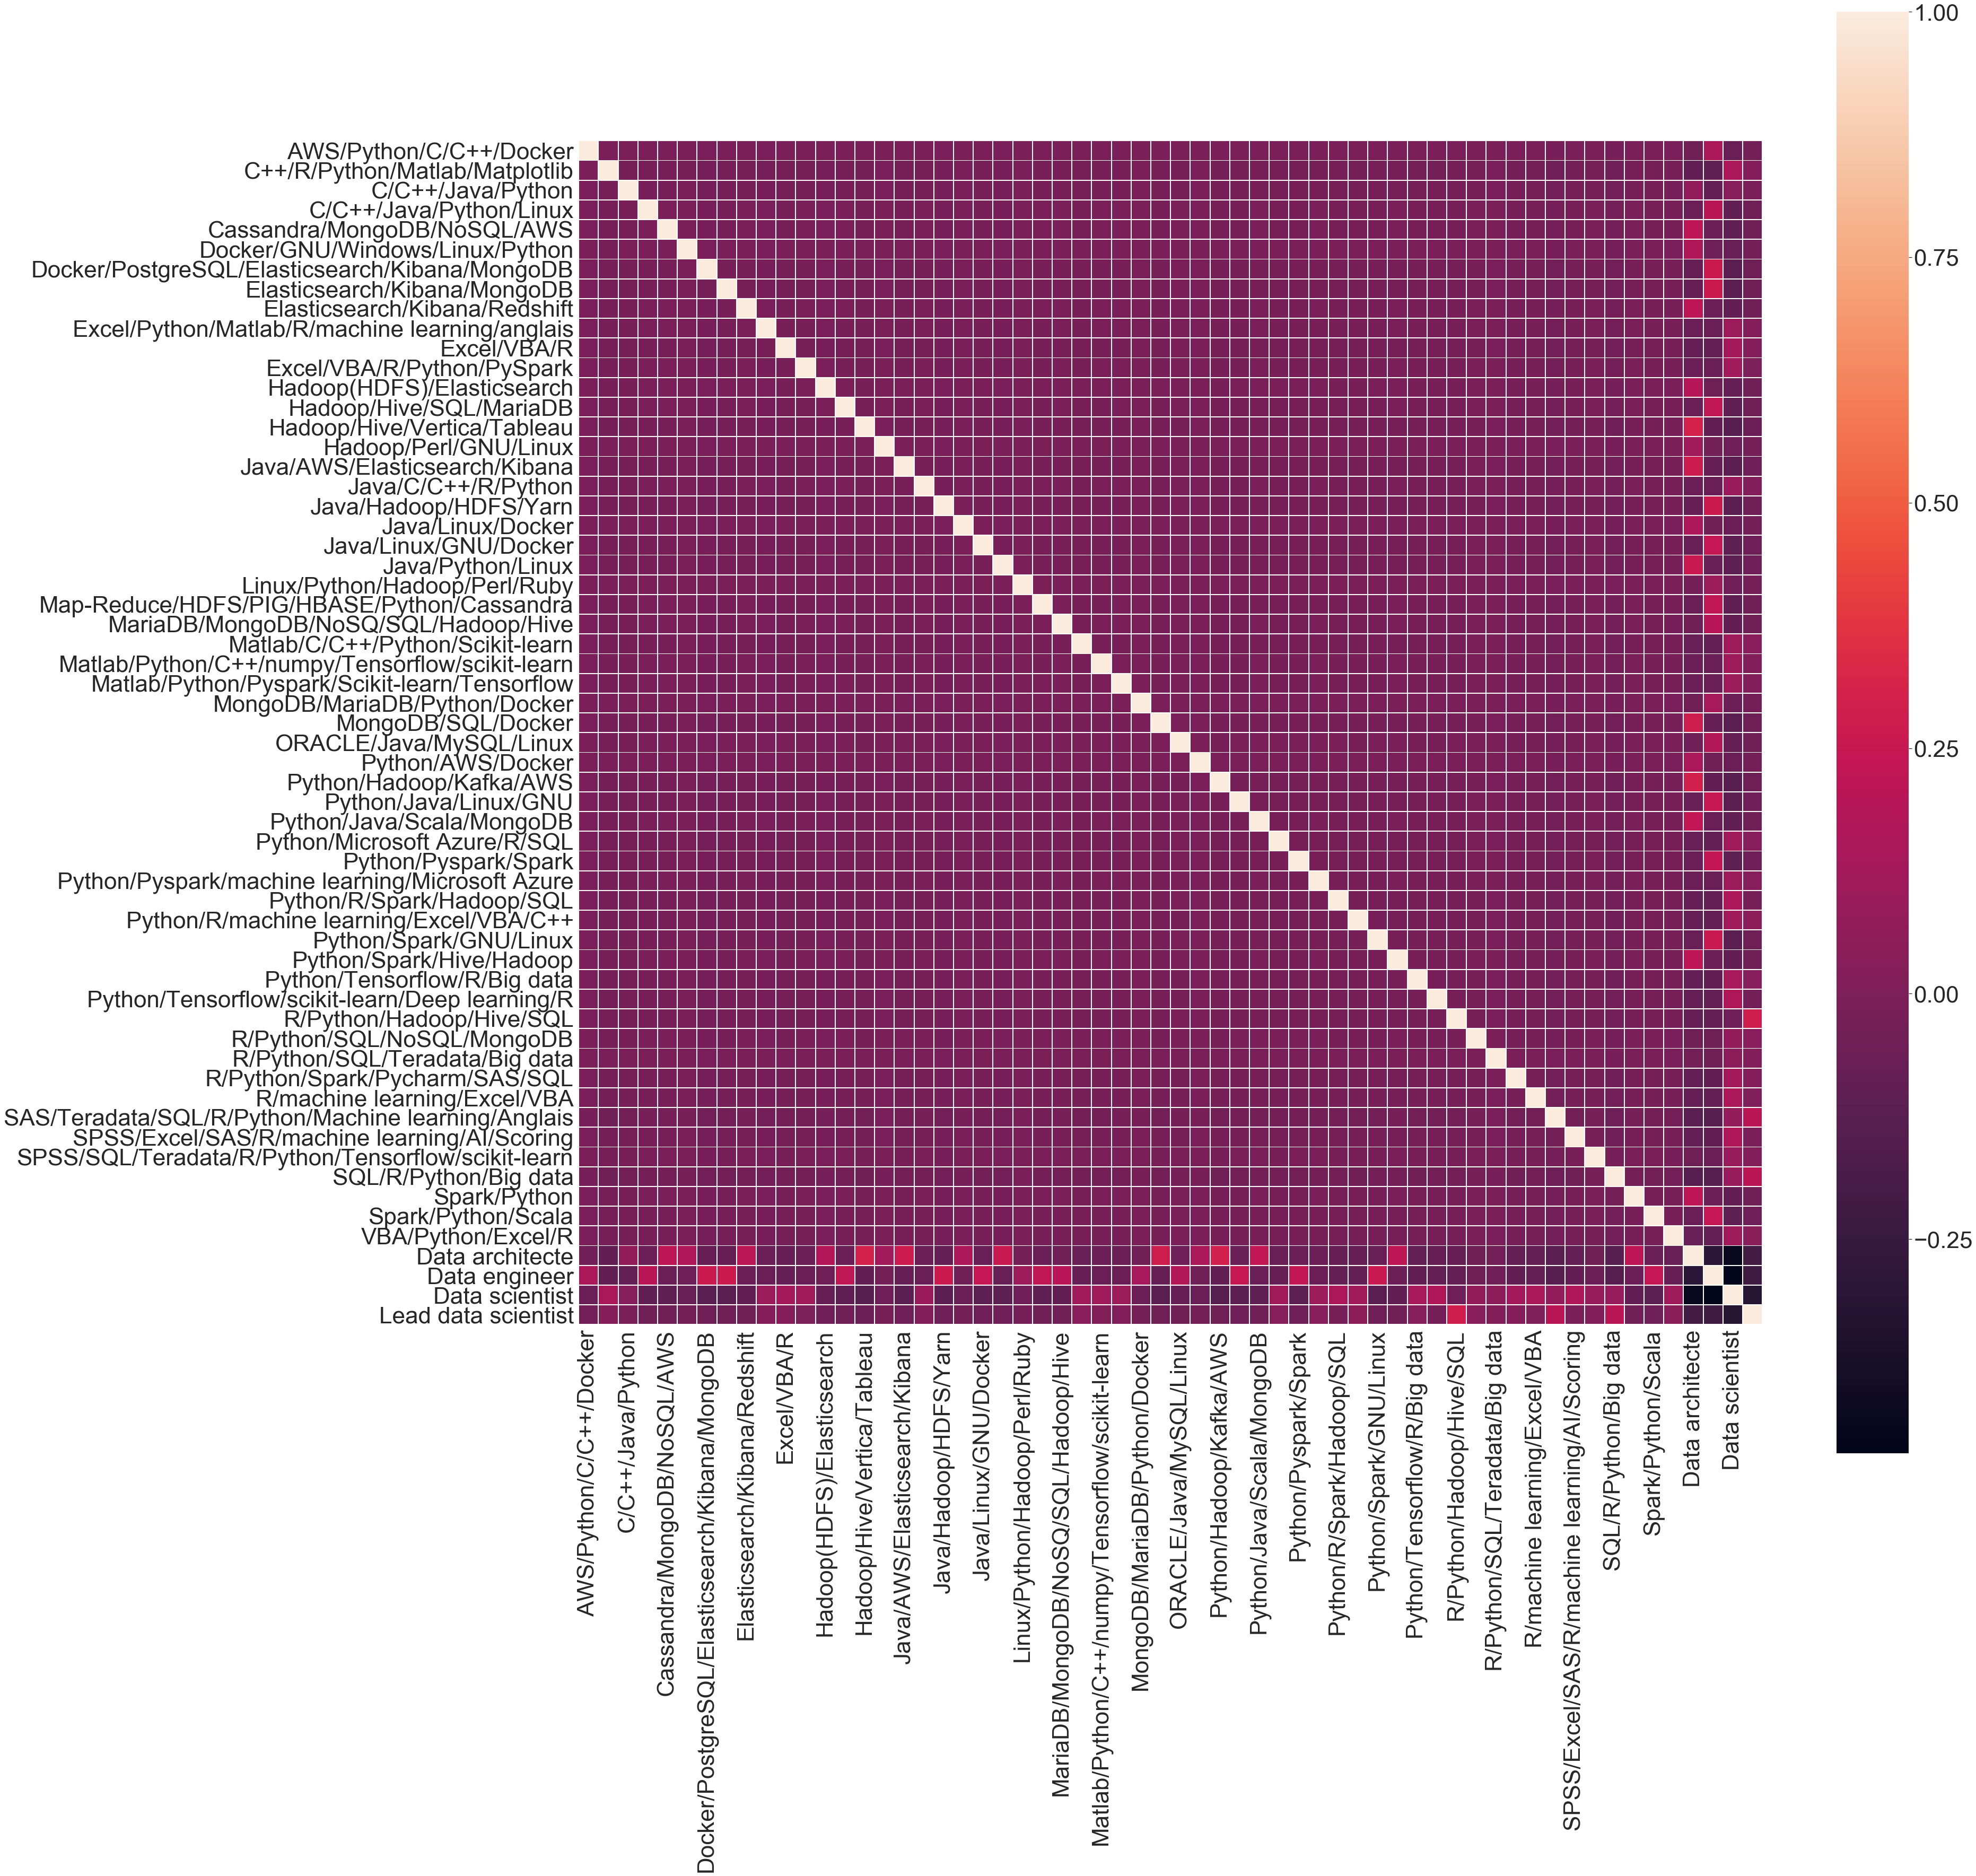

In [16]:
#on s'interesse mlaintenant au correlation colonnes par colonne .
#selection des colonnes technoloiges, metier et experience suivi du onehotcoding.
small_df=df[['Technologies','Metier']]
dfDummies = pd.get_dummies(small_df ,prefix='', prefix_sep='')
cor = dfDummies.corr() 
plt.figure(figsize=(50, 50))
sb.set(font_scale=4)
sb.heatmap(cor,linewidths=1, square = True)


# on constate qu'il ya une correlation entre les metier et les technologies. On voit bien qu'a partir des technologies 
#matrisé par le profil on peux predire son metier.

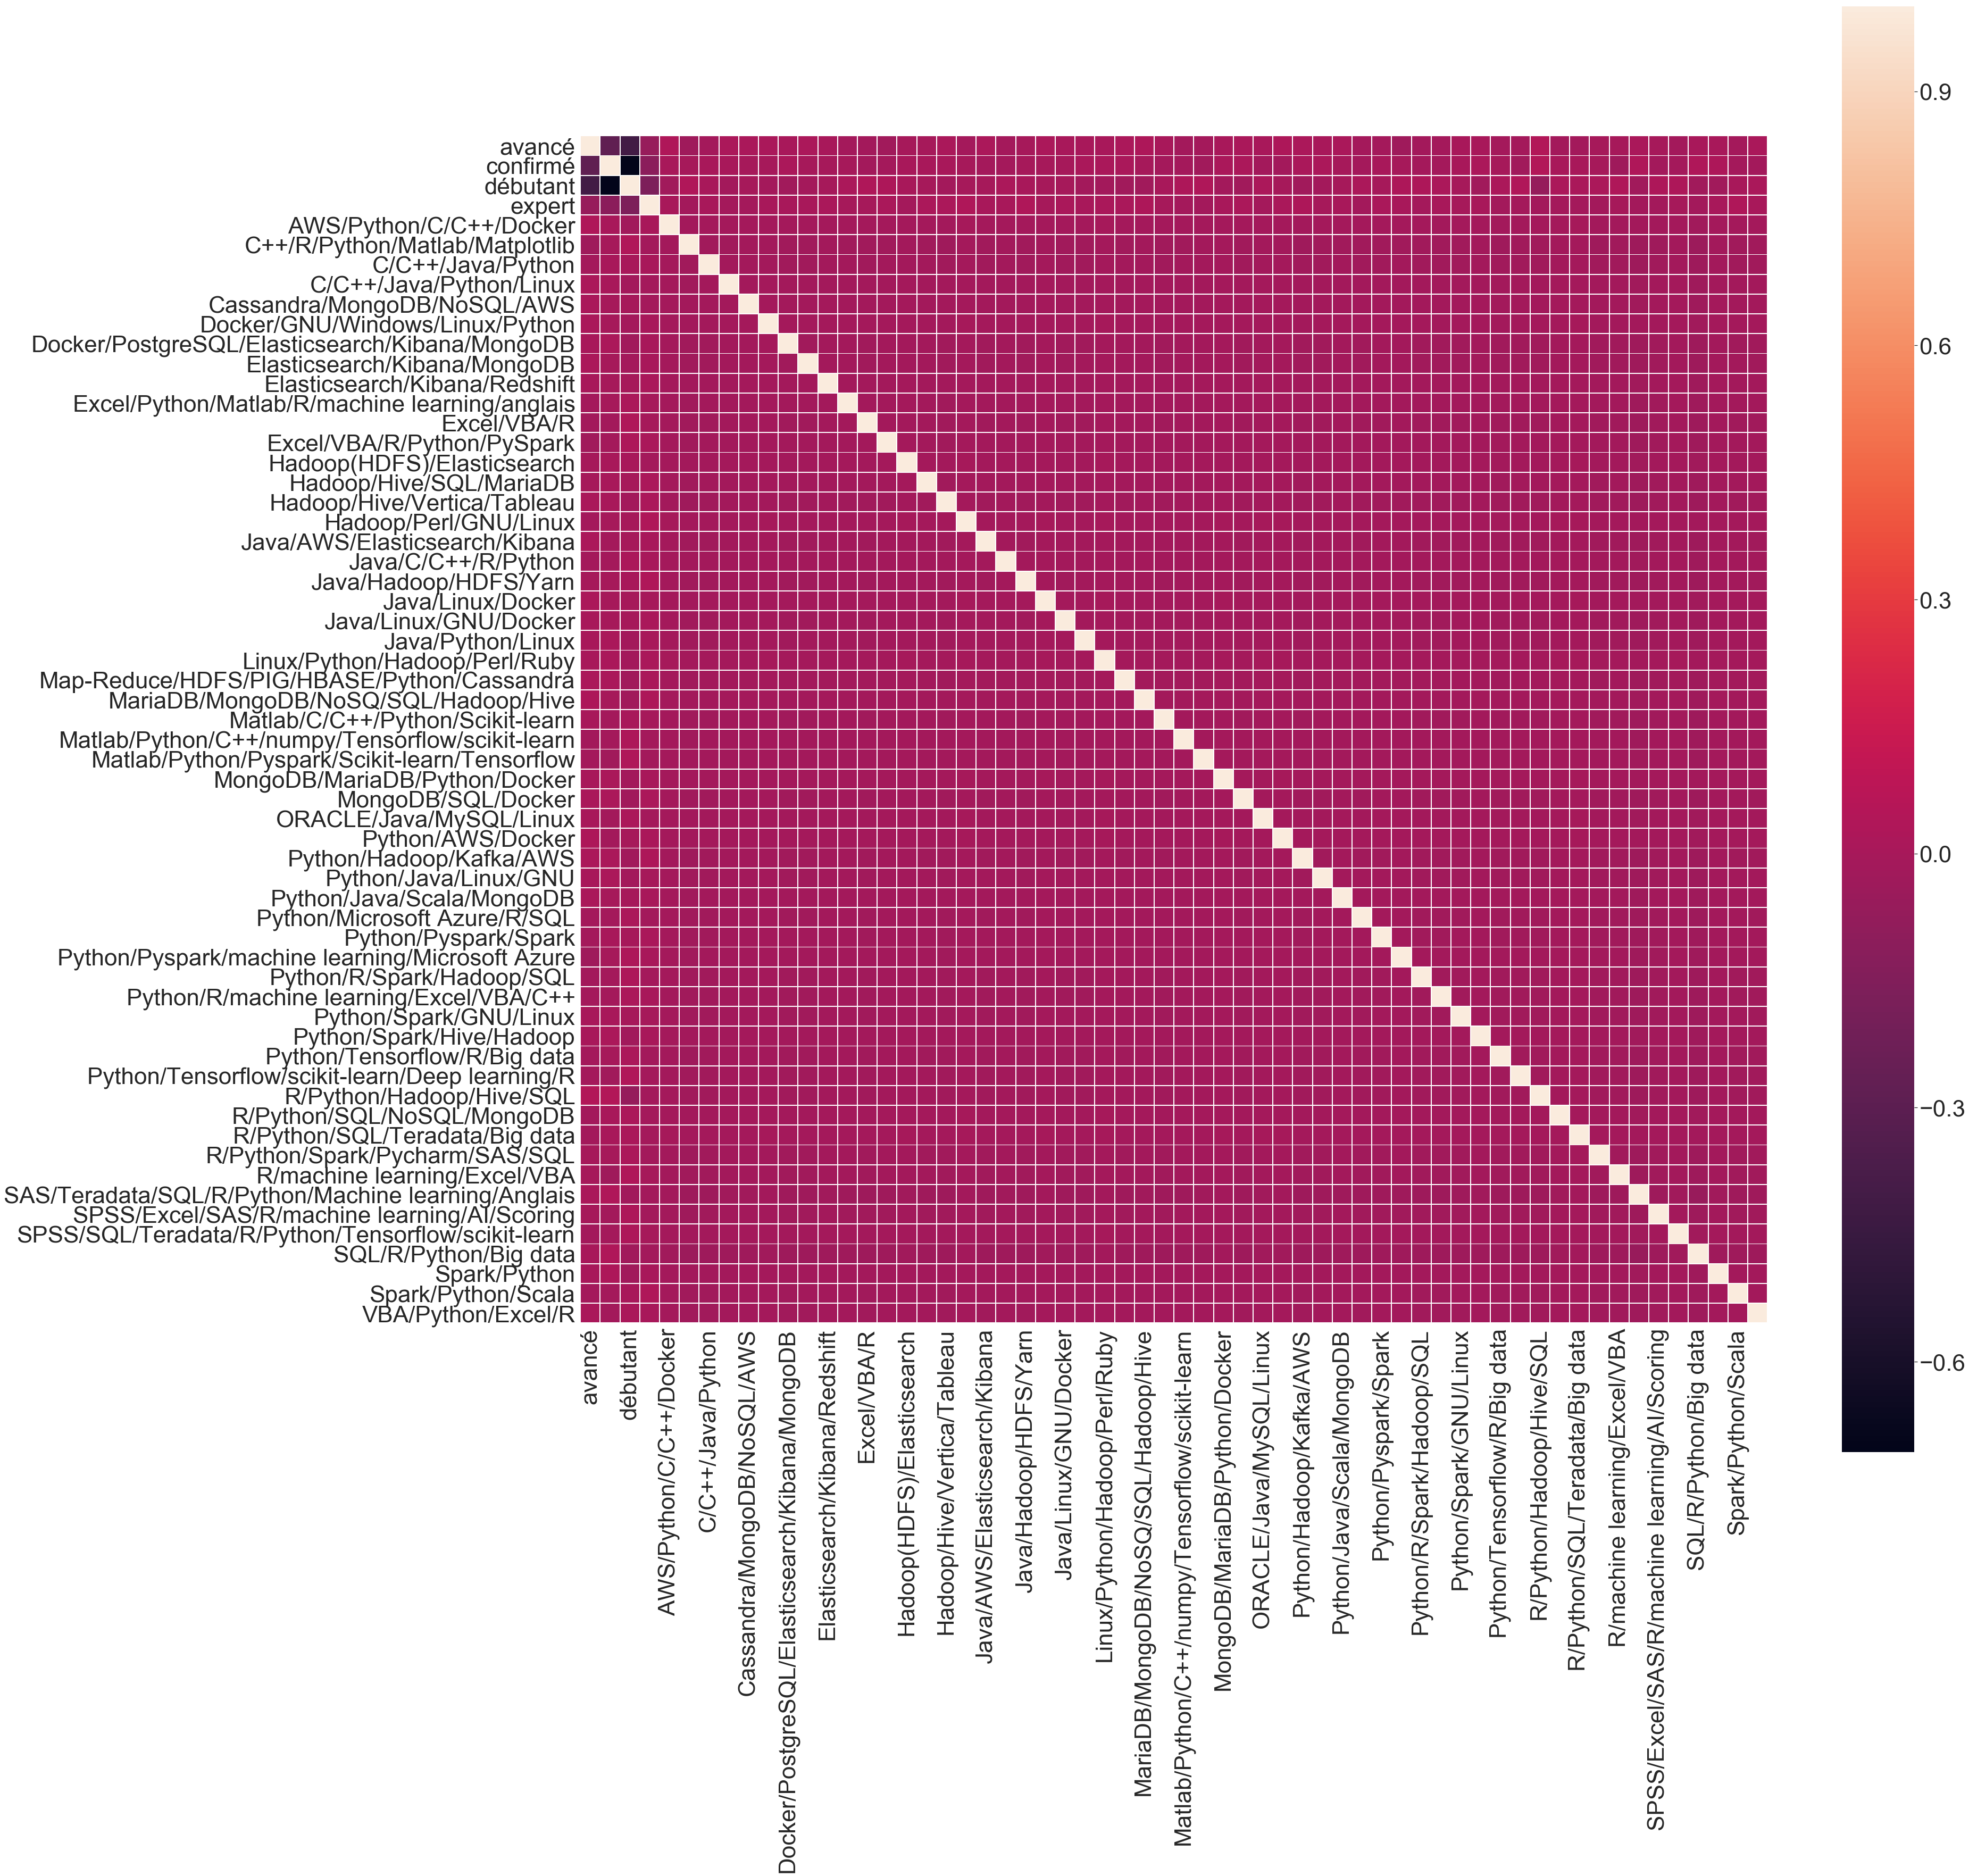

In [17]:
#selection des colonnes technoloiges, Experience et experience suivi du onehotcoding.
small_df=df[['Experience','Technologies']]
dfDummies = pd.get_dummies(small_df ,prefix='', prefix_sep='')
cor = dfDummies.corr() 
plt.figure(figsize=(50, 50))
sb.set(font_scale=4)
sb.heatmap(cor,linewidths=1, square = True)

# la correlation entre l'experience et les technologie est faible et uniforme pour tou les metiers et toutes les technologies.

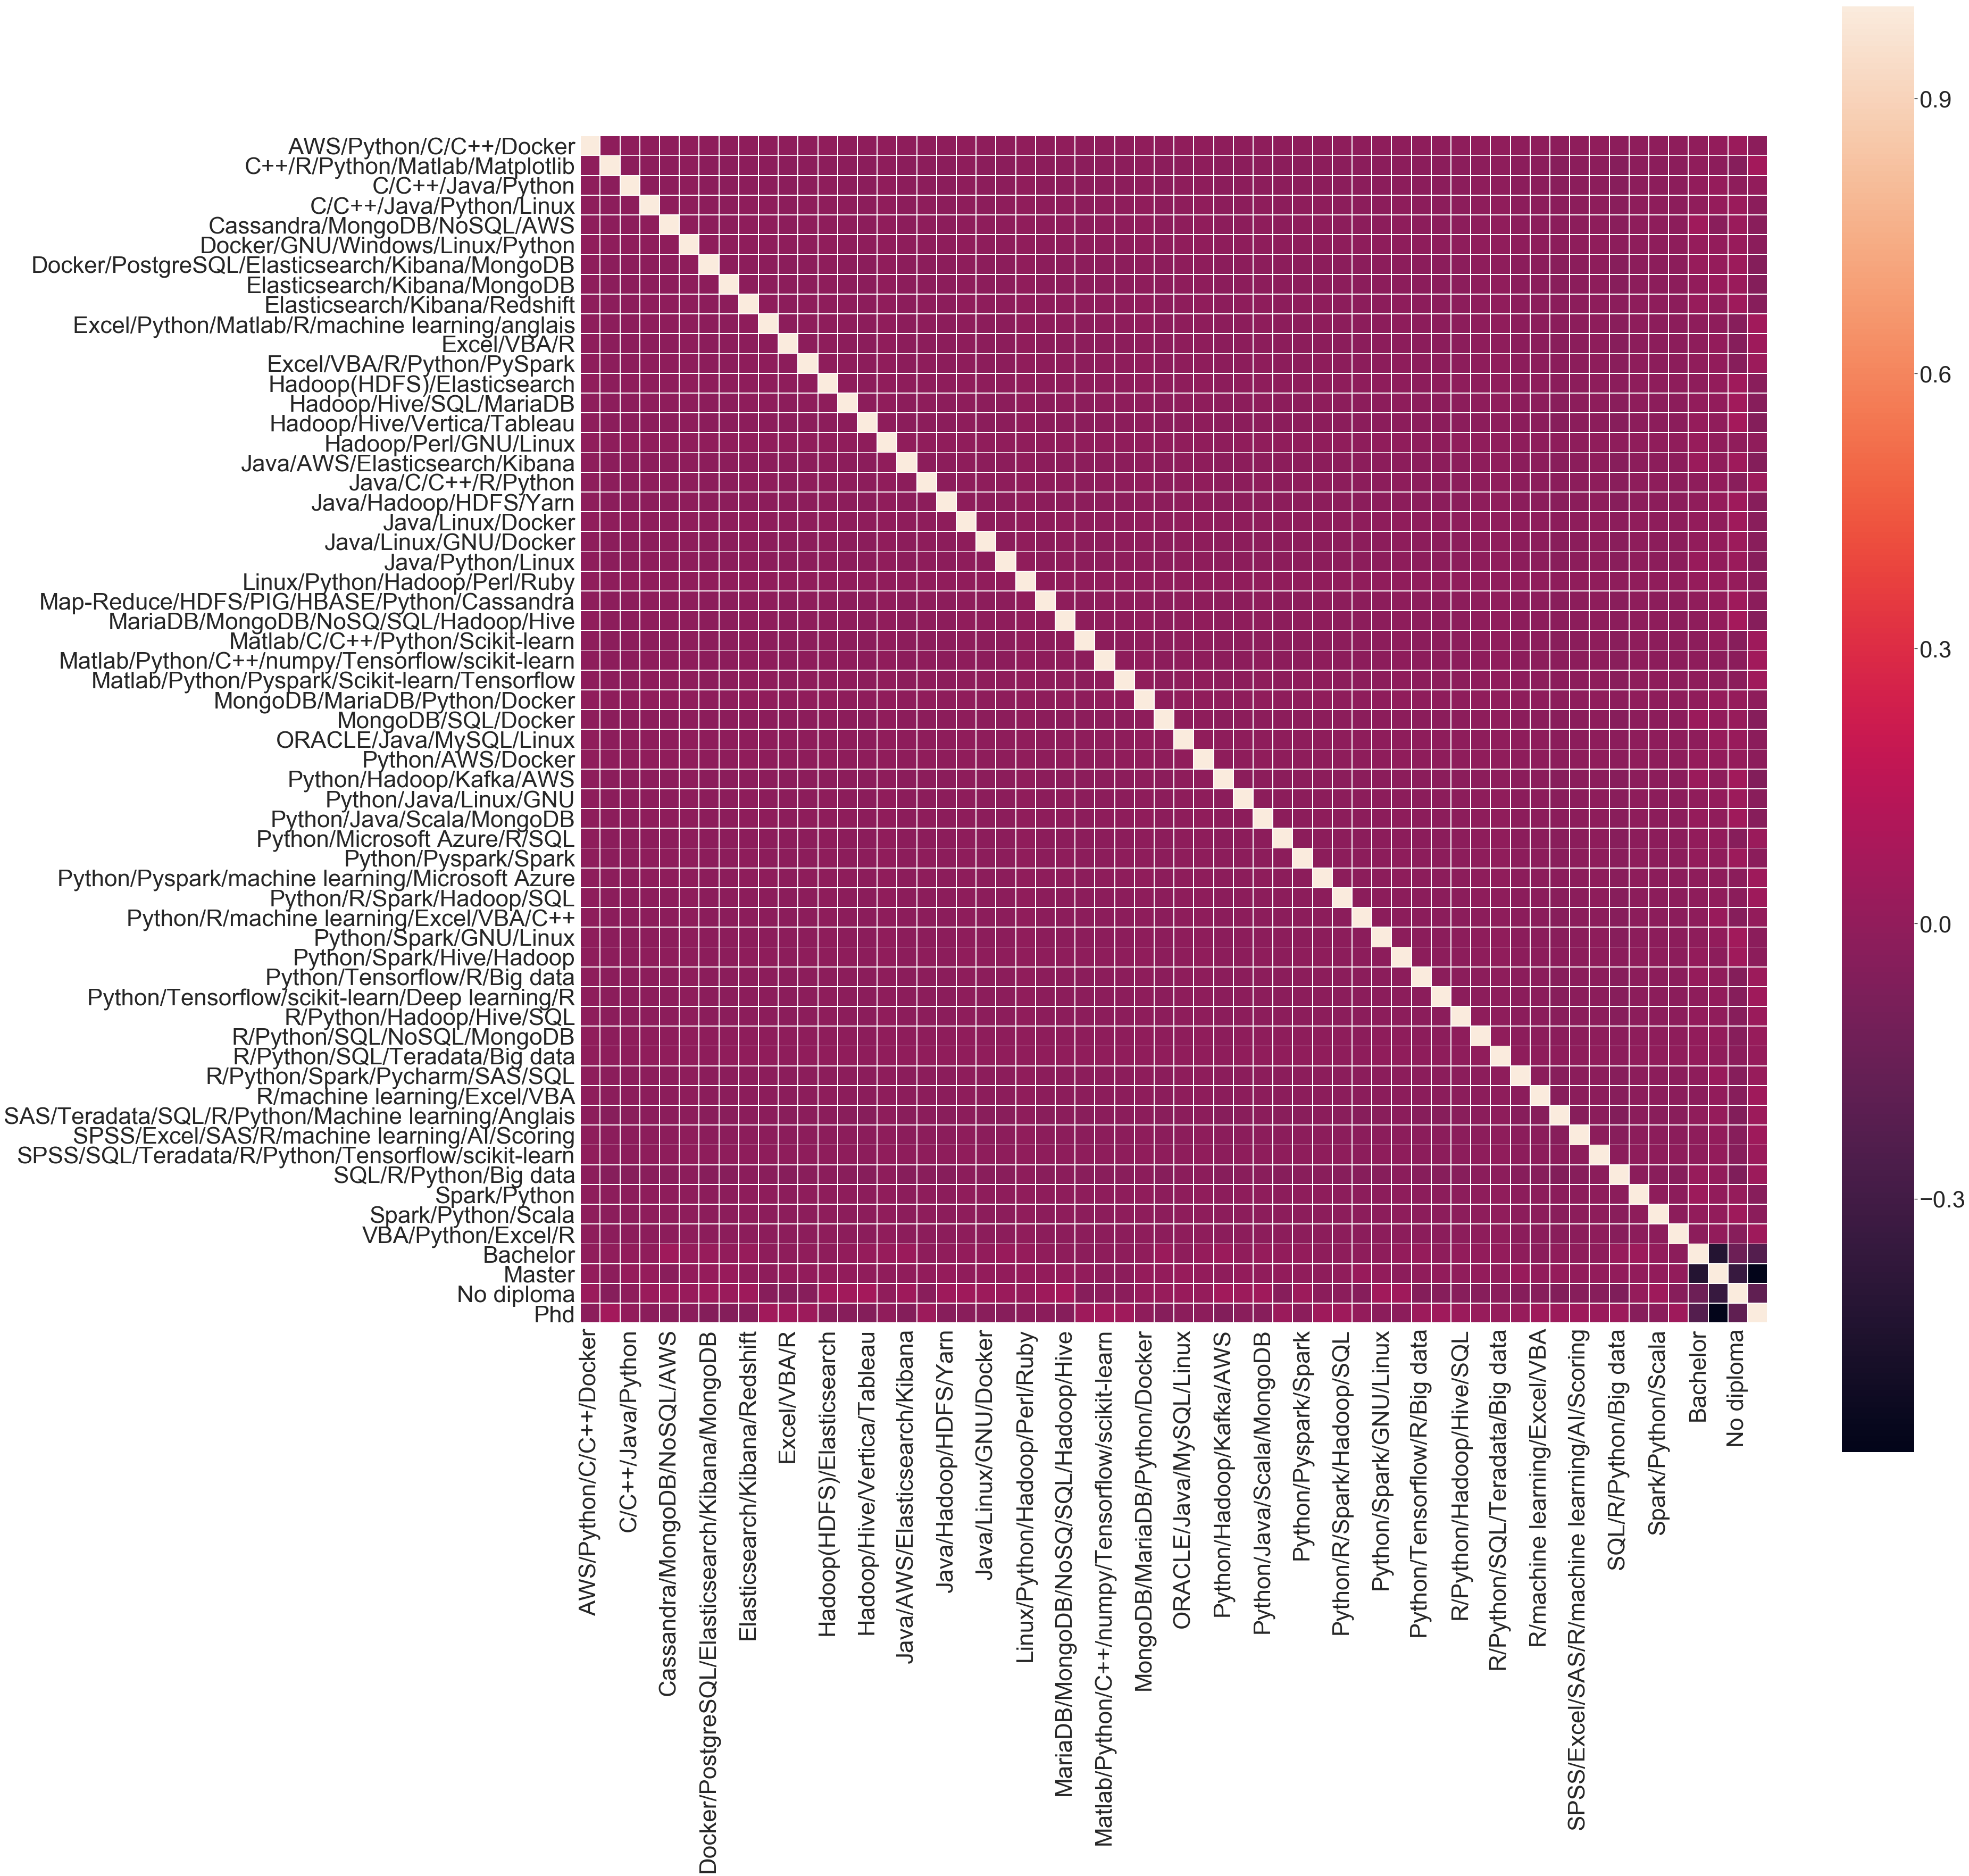

In [18]:
#selection des colonnes technoloiges, Diplome et experience suivi du onehotcoding.
small_df=df[['Technologies','Diplome']]
dfDummies = pd.get_dummies(small_df ,prefix='', prefix_sep='')
cor = dfDummies.corr() 
plt.figure(figsize=(50, 50))
sb.set(font_scale=4)
sb.heatmap(cor,linewidths=1, square = True)

# la correlation entre les diplome et les technologie est faible et uniforme pour tou les metiers et toutes les technologies.

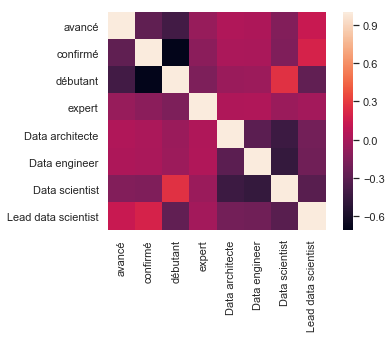

In [19]:
#selection des colonnes Metier, Experience et experience suivi du onehotcoding.
small_df=df[['Experience','Metier']]
dfDummies = pd.get_dummies(small_df ,prefix='', prefix_sep='')
cor = dfDummies.corr() 
sb.set(font_scale=1)
sb.heatmap(cor, square = True)

#cette representation nous permet en effet de constater qu'il y a une correlation entre l'experience et le metier.
# on constatte par exemple une forte correlation entre les leads data scientist et les niveau avancé et confirmé 
#plus que pour debutants et experts.
#les datascientists ont une plus grande correlation avec le niveau debutant.
# pour le reste des metier on a une repartition assez homogene des niveeau d'experience.

0.15808024683200167

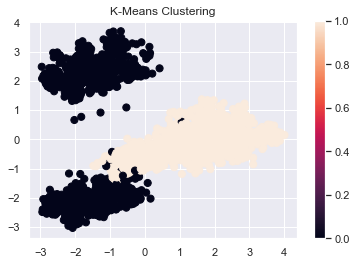

In [20]:
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#j'effectue un premier clustering sur toutes les colonnes pour une premiere etape.
#Onehot coding du data frame.
dfDummies = pd.get_dummies(df ,prefix='', prefix_sep='')
dfDummies_standardisé = StandardScaler().fit_transform(dfDummies)

# je selectionne 10 composantes principale
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(dfDummies_standardisé)
kmeans = KMeans(n_clusters=2, random_state=0,init='random')
kmeans.fit(principalComponents)
principalComponents=np.array(principalComponents)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalComponents[:,0],principalComponents[:,1],c=kmeans.labels_,s=50)
ax.set_title('K-Means Clustering')
plt.colorbar(scatter)

silhouette_score(principalComponents, kmeans.labels_)

0.6728048184973681


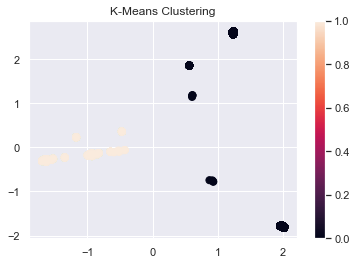

In [21]:
# j'effectue un clustering entre les metiers et technologies. parceque je juge que c'est les 2 vairbales 
#qui sont le plus correlés et qui represent le mieux le dataframe.

new_df=df[['Metier','Technologies']]
dfDummies = pd.get_dummies(new_df ,prefix='', prefix_sep='')
dfDummies_standardisé = StandardScaler().fit_transform(dfDummies)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfDummies_standardisé)
kmeans = KMeans(n_clusters=2, init='random',n_init=1000, max_iter=10, tol=1e-05, random_state=0)
kmeans.fit(principalComponents)
principalComponents=np.array(principalComponents)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalComponents[:,0],principalComponents[:,1],c=kmeans.labels_,s=50)
ax.set_title('K-Means Clustering')
plt.colorbar(scatter)

print(silhouette_score(principalComponents, kmeans.labels_))


#Le graph obtenu nous permet de constater que les 2 cluster ont eté mieux separé apres avoir selectionné les variables metier
#et les technologies
#le score obtenu est plus important que celui pour toute la dataframe. 

### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

In [22]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier



In [23]:

#dans cette partie je vais je vais créer un subset de données clean ou toutes les lignes sont labelisé pour la variable metier.
#recuperations des lignes ou le metier est labelisé
df_cleaned=df[df['Metier'].notnull()]

#Recuperation des labels et des données en entrée.
X_cleaned=df_cleaned[['Technologies','Diplome','Experience']]
Y_cleaned=df_cleaned[['Metier']]

#utilisation du onehotcoding pour les X_train et X_a_predire
X_cleaned= pd.get_dummies(X_cleaned)


#Division des données en partie entrainement et partie test.
X_train,X_test,Y_train,Y_test=train_test_split(X_cleaned,Y_cleaned,test_size=0.2)

#Codage des Y_train en multiclass.
encoder = preprocessing.LabelEncoder()
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train)

#Codage des Y_test en multiclass.
encoder.fit(Y_test)
Y_test = encoder.transform(Y_test)


c:\programdata\anaconda3\envs\nanovare\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\programdata\anaconda3\envs\nanovare\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# Grid search pour l'entrainement du SVM
'''
# Definition des parametres pour le SVM gridsearch
parametres = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

#Entrainement des differets models SVM avec les differents parametres.
svm_model = GridSearchCV(SVC(), parametres, cv=5)
svm_model.fit(X_train, Y_train)

# Affichage des meilleurs parametres
print('Meilleur configuration pour le SVM:',svm_model.best_estimator_,"\n") 

#recuperation du meilleur model afin d'effectuer une mesure de performance basé sur l'accuracy et le F1_score obtenu par la 
# classification report
svm_model = svm_model.best_estimator_
Y_pred = svm_model.predict(X_test)

#affichage des results.
print("Score sur les données d'entrainement pour le SVM: %f" % svm_model.score(X_train , Y_train))
print("Score sur les données test pour le SVM: %f" % svm_model.score(X_test  , Y_test ))

print(classification_report(Y_test, Y_pred)) 


Meilleur configuration pour le SVM: SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

Score sur les données d'entrainement pour le SVM: 0.893725
Score sur les données test pour le SVM: 0.880815
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       426
           1       1.00      1.00      1.00       471
           2       0.80      0.94      0.86       761
           3       0.67      0.34      0.45       255

    accuracy                           0.88      1913
   macro avg       0.87      0.81      0.82      1913
weighted avg       0.87      0.88      0.87      1913



In [25]:
#Grid search pour le rondom forest
'''
#Definition des parametres pour le RF gridsearch
rf = RandomForestClassifier() 

parametres = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

RF = GridSearchCV(estimator=rf, param_grid=parametres, cv= 5)
RF.fit(X_train, Y_train)

#Affichage des meilleurs parametres
print('Meilleur configuration pour le RF:',RF.best_estimator_,"\n") 


# recuperation du meilleur model afin d'effectuer une mesure de performance basé sur l'accuracy et le F1_score obtenu par la 
# classification report
rf_model = RF.best_estimator_
print("Score sur les données d'entrainements pour le RF: %f" % rf_model.score(X_train , Y_train))
print("Score sur les données test pour le RF: %f" % rf_model.score(X_test  , Y_test ))
Y_pred = rf_model.predict(X_test)
print(classification_report(Y_test, Y_pred))
 '''

Meilleur configuration pour le RF: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 

Score sur les données d'entrainements pour le RF: 0.907582
Score sur les données test pour le RF: 0.871406
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       426
           1       1.00      1.00      1.00       471
           2       0.81      0.88      0.85       761
           3       0.61      0.44      0.51       255

    accuracy                           0.87      1913
   macro avg       0.85      0.82      

In [26]:
# Grid search pour l'entrainement du MLP
'''

mlp = MLPClassifier(max_iter=100)
parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

#Entrainement des differets models MLP avec les differents parametres.
Mlp = GridSearchCV(mlp, parameters, n_jobs=-1, cv=3)
Mlp.fit(X_train, Y_train)

# Affichage des meilleurs parametres
print('Meilleur configuration pour le MLP:',Mlp.best_estimator_,"\n") 

#recuperation du meilleur model afin d'effectuer une mesure de performance basé sur l'accuracy et le F1_score obtenu par la 
# classification report
MLP_model = Mlp.best_estimator_
print("Training set score for MLP: %f" % MLP_model.score(X_train , Y_train))
print("Testing  set score for MLP: %f" % MLP_model.score(X_test  , Y_test ))
Y_pred = MLP_model.predict(X_test)
print(classification_report(Y_test, Y_pred))
'''    

c:\programdata\anaconda3\envs\nanovare\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Meilleur configuration pour le MLP: MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False) 

Training set score for MLP: 0.900000
Testing  set score for MLP: 0.888657
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       426
           1       1.00      1.00      1.00       471
           2       0.82      0.93      0.87       761
           3       0.68      0.38      0.49       255

    accuracy                           0.89      1913
   macro avg       0.87      0.83      0.84      1913
weigh

In [33]:
# se basant sur les scores F1 , on voit bien que les 3 classifieurs ont quasiment le meme resultat. néamoins je prefere choisir 
# le MLP pour effectuer la prediction.

#recuperations des indexes des lignes ou le metier n'est pas labelisé et creation du vecteur sur lequel predire
indexes_metiers_manquants=df[df['Metier'].isnull()].index.tolist()

#recuperation de toutes les variables sauf la variable metier afin de selectionner les profil a predire.
cutted_df=df[['Technologies','Diplome','Experience']]
dfDummies = pd.get_dummies(cutted_df ,prefix='', prefix_sep='')

#selection des lignes uniquement ou le metier n'est pas labelisé pour les predire.
X_to_predict=dfDummies.loc[np.array(indexes_metiers_manquants), :]

#Pour ce faire , je recupere les valeurs qui ont permis d'avoir le meilleur resultat lors du gridsearch. 
MLP_model = MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

MLP_model.fit(X_train, Y_train)


print("Training set score for MLP: %f" % MLP_model.score(X_train , Y_train))
print("Testing  set score for MLP: %f" % MLP_model.score(X_test  , Y_test ))
Y_pred = MLP_model.predict(X_test)
print(classification_report(Y_test, Y_pred))


c:\programdata\anaconda3\envs\nanovare\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score for MLP: 0.899869
Testing  set score for MLP: 0.890748
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       426
           1       1.00      1.00      1.00       471
           2       0.82      0.94      0.87       761
           3       0.70      0.37      0.49       255

    accuracy                           0.89      1913
   macro avg       0.87      0.83      0.84      1913
weighted avg       0.88      0.89      0.88      1913



In [31]:
#prediction des metier manquants.
Y_pred = MLP_model.predict(X_to_predict)

#decodage des labels pour obtenir les metier des profils.
Y_pred = encoder.inverse_transform(Y_pred)

print(Y_pred)

['Data engineer' 'Data scientist' 'Data scientist' 'Data scientist'
 'Data architecte' 'Data scientist' 'Data scientist' 'Lead data scientist'
 'Data engineer' 'Data scientist' 'Data architecte' 'Data engineer'
 'Data architecte' 'Data scientist' 'Data engineer' 'Data scientist'
 'Data architecte' 'Data scientist' 'Data scientist']


### 10) Décrire de façon détaillée les différentes étapes pour mener à bien un projet data complexe.

Dans le cadre d’une campagne de recrutement vous avez reçu un ensemble de cv qui ne sont pas à jour (le poste actuel n’est pas présent). Deux exemple de CV vous sont donnés en pièce jointe (il n'y a pas de mise en page type). Tous les CV sont au format PDF.

On souhaite connaitre le poste actuel de chaque candidat.

-  Quelles sont les différentes étapes nécessaires à la réalisation d'un tel projet?
-  Pour chaque étape, détaillez les taches à accomplir, les méthodes à suivre, les pistes possibles, les points critiques.
-  Justifiez consciencieusement vos choix


In [29]:
'''
Ayant essayé les bibliotheques pour lecture de fichier PDF et recuperation du text pour analyse. je me rend compte que 
les documents ont eté scannées et non sauvegardés en format PDF.
Pour resoudre ce probleme on pourrait utiliser les methodes de reconnaissance optique de caractères ; ces derniers detectent
les caracteres et les sauvegardent en format text pour effectuer les analyses dessus.

Une fois cette etape de pretraitement effectué on devra analyser le contenu du text. pour faire ceci, je propose d'effectuer 
une recherche basé sur des mots clés :
1 - Recherche sur le Metier de chaque profil : 4 labels sont à rechercher  :" Data Scientist, Data architect,Data engineer, 
Lead Data scientist"

2-  recherche des Technologies pour chaque profil: rechercher tous les mots clés qui sont contenu dans toutes les technologies
repertoriés dans la liste suivante obtenu de la variable technologies dans le fichier csv:
SQL, R, Python, Big data ,SAS ,Teradata, Machine-learning, C++, Matlab, MatplotlibHadoop, Hive, Vertica, Tableau, SPSS, Excel,
AI, Scoring, Tensorflow, Spark, Pycharm, Hadoop, Kafka, AWS, VBA, scikit-learn, Deep-learning,java, Hive, Docker, PostgreSQL, 
Elasticsearch, Kibana, MongoDB, HDFS, Yarn, GNU, Linux, Microsoft Azure, Scala, Map-Reduce, HDFS, PIG, HBASE, Cassandra, MariaDB,
numpy, NoSQL, Redshift, SPSS, Windows, Perl, Ruby.

3- recherche basé sur les dates : cette dereniere nous permettera d'extraire les information sur l'experience de chaque profil.
" rechercher les caracteres '-' ou '/' et s'assurer qu'ils sont bien péecedés et suivis de nombre pour les considerer 
comme des dates". 
rechercher aussi les mois : janvier, fevrier, mars, avril, mai, juin, juillet, aout, septembre, octobre, novembre et decembre.
une fois les dates detectés, calculer le nombre d'année d'experience et les additionner dans le cas ou le sujet a 
plusieurs experiences precedentes.

4- recherche des diplomes obtenus par les profils : Bachelor, Master , PhD.
dans le cas ou aucun de ces mots clés n'a eté trouvé on sopose que la personne en question n'a pas de diplome.

Une fois toutes ces données obtenus, on recupere la liste des valeurs uniques de la variable technologies. 
on effectue une comparaison entre les technologies detectés dans le fichier text et les technologies utilisés pour
l'entrainement de notre modele. On trouve l'element de la liste de valeur uniques qui ressemble le plus a nos technologies.  

On convertit aussi le nombre d'année d'experience en variable categorique suivant la reponse a la question 5.


Une fois toutes ces informations receuillis:
-On recupere le onehotcoding de la variable technologies qui ressemble le plus au technologies de notre profil.
-On recupere le onehotcoding equivalent a la categorie d'experience de notre profil.
-on recupere aussi le onehotcoding du diplome du condidat.

On effectue une prediction de son metier actuel afin de determiner son poste actuelle.



###les points critiques :
une mauvaise numerisation du document et une mauvaise reconversion du text ; cette tache peut etre consideré comme la plus 
importante et la plus dificile à mener a bien.

dans le cas ou les dates n'ont pas pu etre lu dans le fichier text, une imputation de la valeur de l'experience peut etre
effectué basé sur la moyenne des profils maitrisant les memes technologies.


Un autre point crituque serai que les technologies ne serai pas deja contenu dans la liste de technologies utilisés pour 
l'entrainement du modele.

Un condidat a plusieurs technologies a son profil , ceci poura par exemple fausser la detection du metier actuelle.

le profil a plusieurs mots clés pour le metier , comme le CV2 , le profil a une experience comme data scientist
et data engineer. on peux suposer que pour ce profil, basé sur ses technologies on peux predire s'il est plus
data scientist ou data engineer ; et ceci en effectuant une prediction basé sur ses technologies.


'''

'\nAyant deja essayé les bibliotheques pour lecture de fichier PDF et recuperation du text pour analyse. je me rend compte que \nles documents ont eté scannées et non sauvegardés en format PDF.\nPour resoudre ce probleme on pourrait utiliser les methodes de reconnaissance optique de caractères ; ce dernier detecte\nles caracteres et les sauvegarde en format text pour effectuer les analyses dessus.\n\nUne fois cette etape de pretraitement effectué on devra analyser le contenu du text. pour faire ceci, je propose d\'effectuer \nune recherche basé sur des mots clés :\n1 - Recherche du Metier de chaque profil : 4 label sont a recherché dans les profils " Data Scientist, Data architect, \nData engineer, Lead Data scientist"\n\n\n2-  recherche des Technologies pour chaque profil: rechercher tous les mots clés qui contient toutes les technologies repertoriés dans \nla liste suivante:\nSQL,R,Python,Big data , SAS,Teradata,Machine learning,C++,Matlab,MatplotlibHadoop,Hive,Vertica,Tableau,SPSS,E